In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from top2vec import Top2Vec
from wordcloud import WordCloud
from matplotlib import font_manager
from collections import Counter
from IPython.display import set_matplotlib_formats

In [2]:
# 한글 폰트 설정
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

# 마이너스 깨짐 설정
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

# 화면 설정
set_matplotlib_formats('retina')

In [3]:
June= pd.read_excel('./dataset/NewsResult_20200601-20200630.xlsx')
July= pd.read_excel('./dataset/NewsResult_20200701-20200731.xlsx')
August= pd.read_excel('./dataset/NewsResult_20200801-20200831.xlsx')
September= pd.read_excel('./dataset/NewsResult_20200901-20200930.xlsx')
October= pd.read_excel('./dataset/NewsResult_20201001-20201029.xlsx')

In [4]:
daylist_June= June[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))
daylist_July= July[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))
daylist_August= August[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))
daylist_September= September[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))
daylist_October= October[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))

In [5]:
daylist_total= pd.concat([daylist_June, daylist_July, daylist_August, daylist_September, daylist_October])

In [6]:
day= int(input("yyyymmdd형태로 날짜를 입력하세요: "))

yyyymmdd형태로 날짜를 입력하세요: 20201001


In [23]:
model = Top2Vec(documents=October['키워드'].to_list(), speed="learn", workers=5)
topic_sizes, topic_nums = model.get_topic_sizes()
print(topic_sizes)
print(topic_nums)

[226 144 125 115 112 109 105 102  89  88  74  74  74  70  64  56  52  52
  52  50  49  45  44  42  42  41  40  39  37  37  35  34  34  34  33  32
  32  32  32  27  26  25  24  21  20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


In [24]:
model.get_topics()

(array([['북서쪽', '영서', '올가', ..., '예년', '먼지', '농도'],
        ['주제', '학생', '온라인', ..., '영상', '발전', '프로젝트'],
        ['단풍', '절정', '내장산', ..., '당부', '장소', '시작'],
        ...,
        ['학과', '전공', '인증', ..., '계기', '발굴', '글로벌'],
        ['태화강', '등재', '부양', ..., '이해', '감안', '먹이'],
        ['대청호', '수역', '조류', ..., '활성화', '원인', '영향']], dtype='<U7'),
 array([[0.9264, 0.9137, 0.8888, ..., 0.5449, 0.5432, 0.5373],
        [0.7044, 0.6449, 0.617 , ..., 0.4279, 0.4203, 0.4161],
        [0.8829, 0.8713, 0.8618, ..., 0.4372, 0.4372, 0.4333],
        ...,
        [0.858 , 0.8016, 0.7434, ..., 0.3159, 0.3089, 0.3081],
        [0.9226, 0.9207, 0.9169, ..., 0.3204, 0.3182, 0.3175],
        [0.8821, 0.7858, 0.7396, ..., 0.2806, 0.2789, 0.2779]]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]))

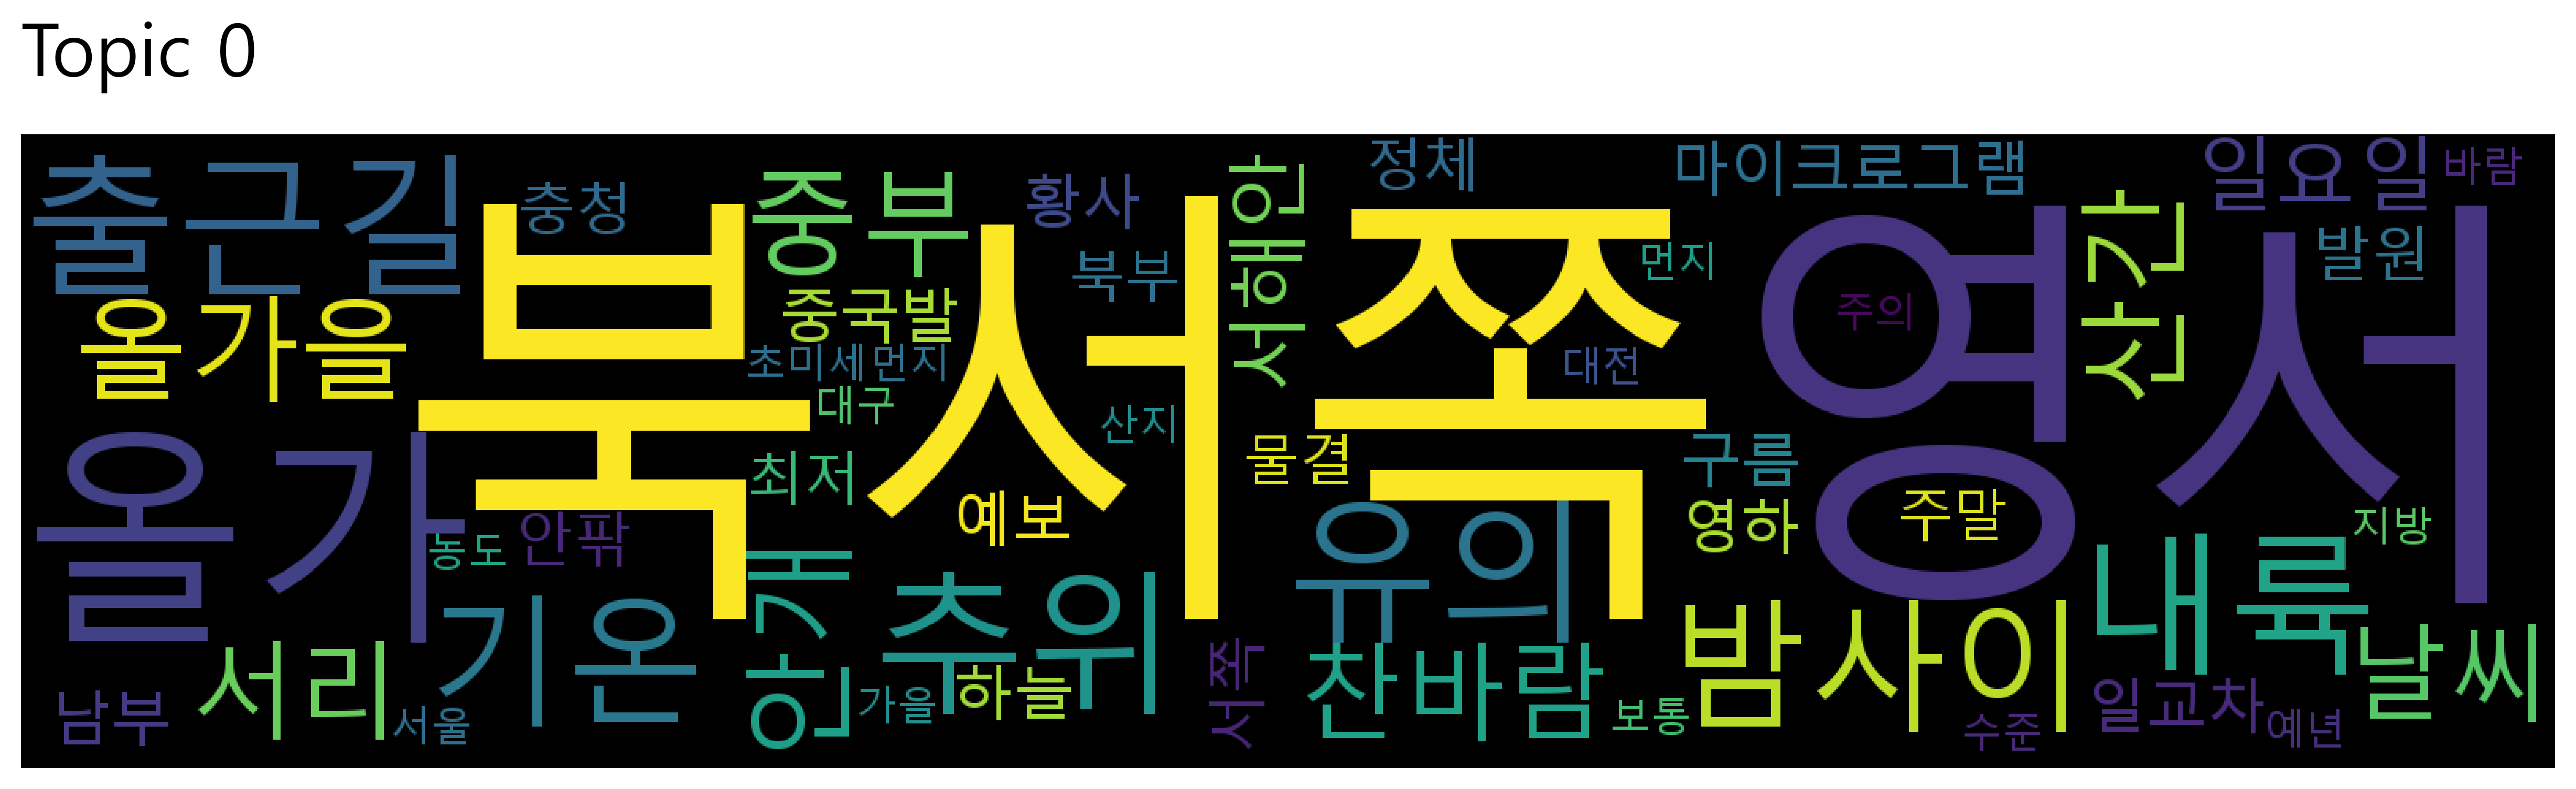

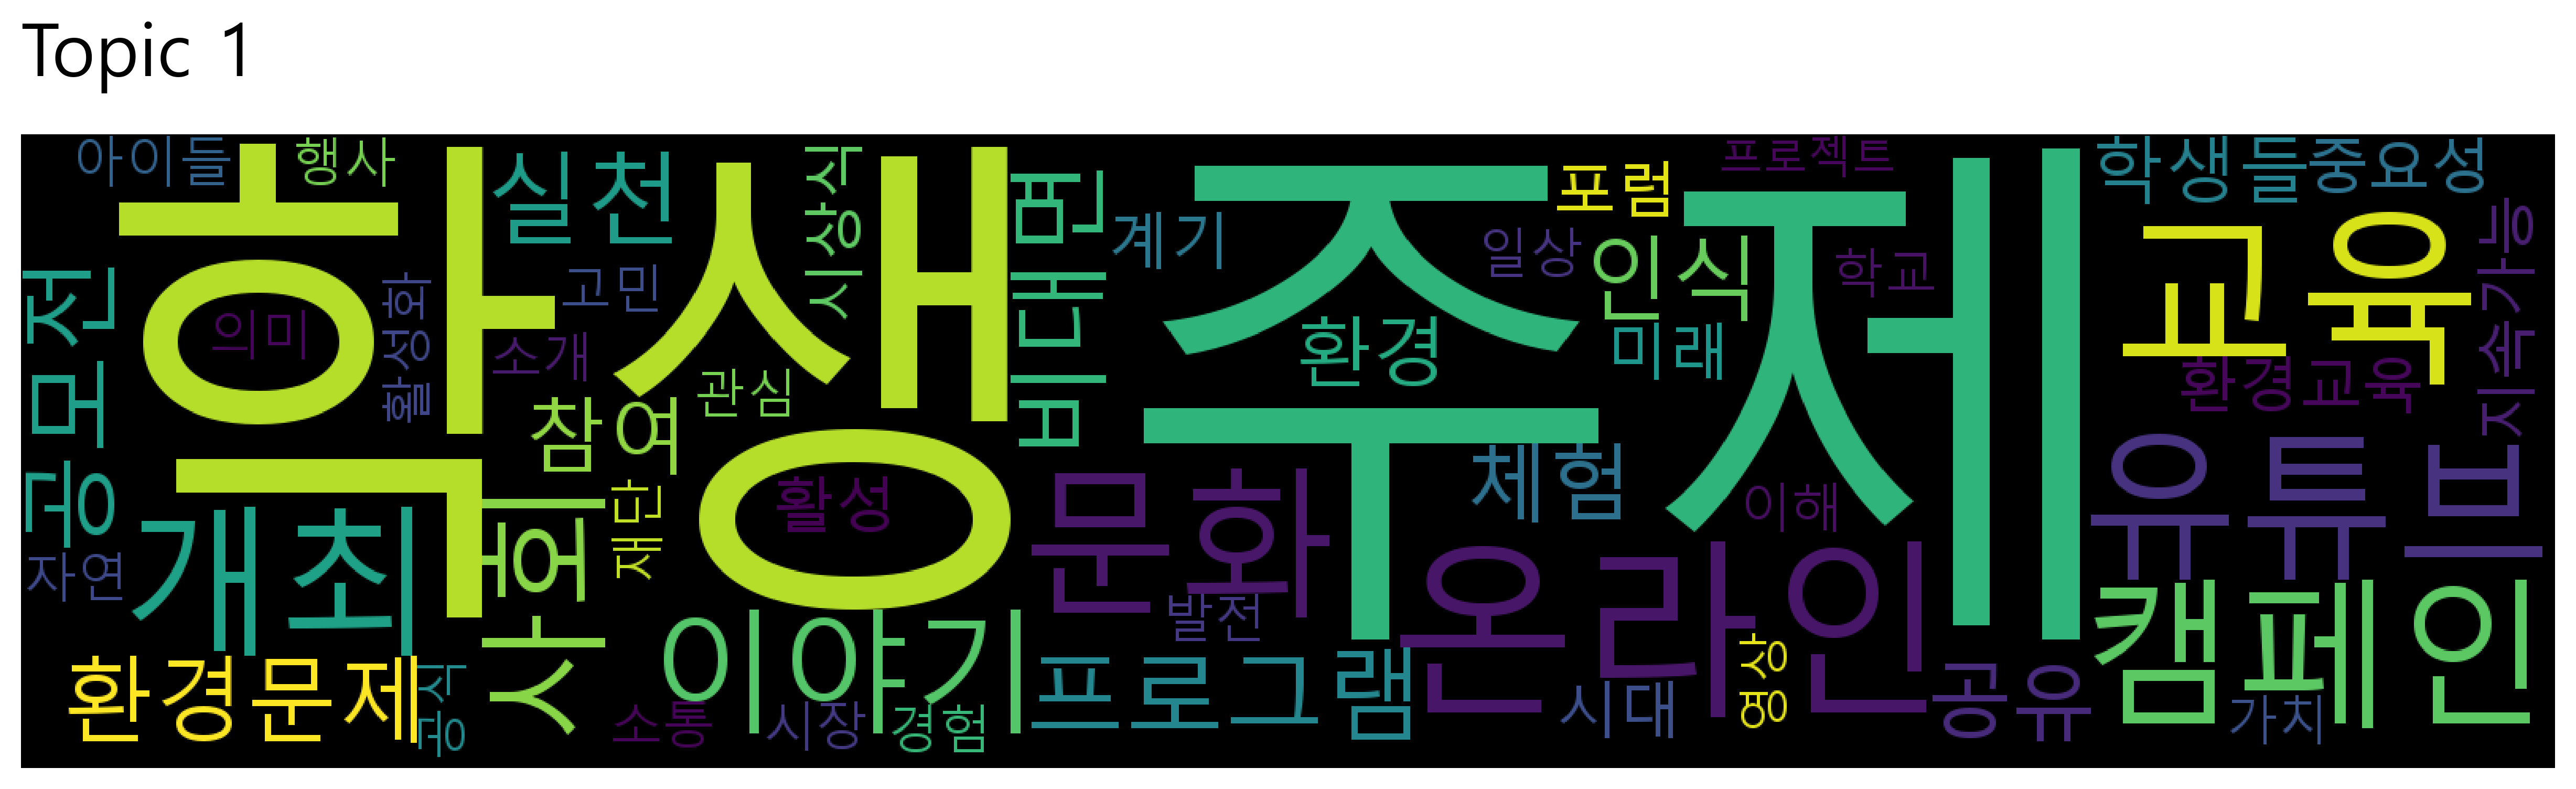

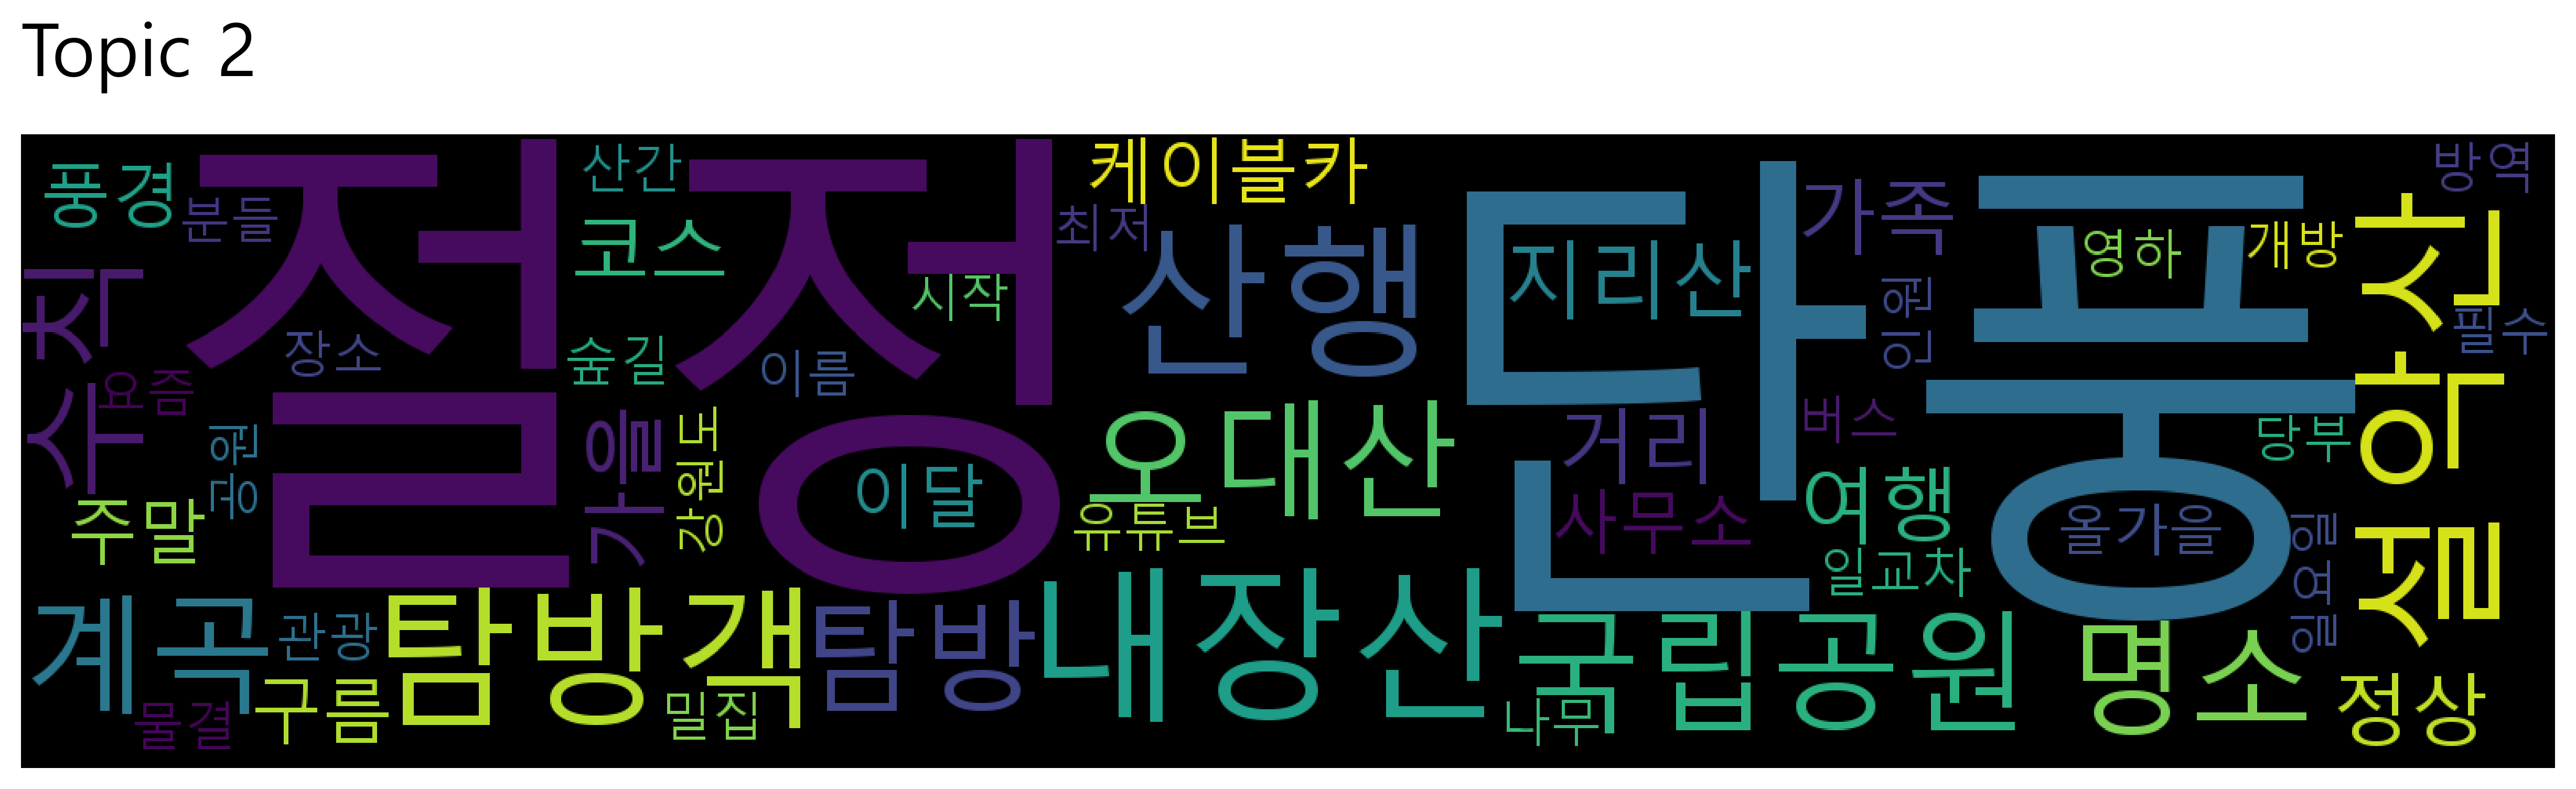

In [25]:
for topic in topic_nums[:3]:
    model.generate_topic_wordcloud(topic)

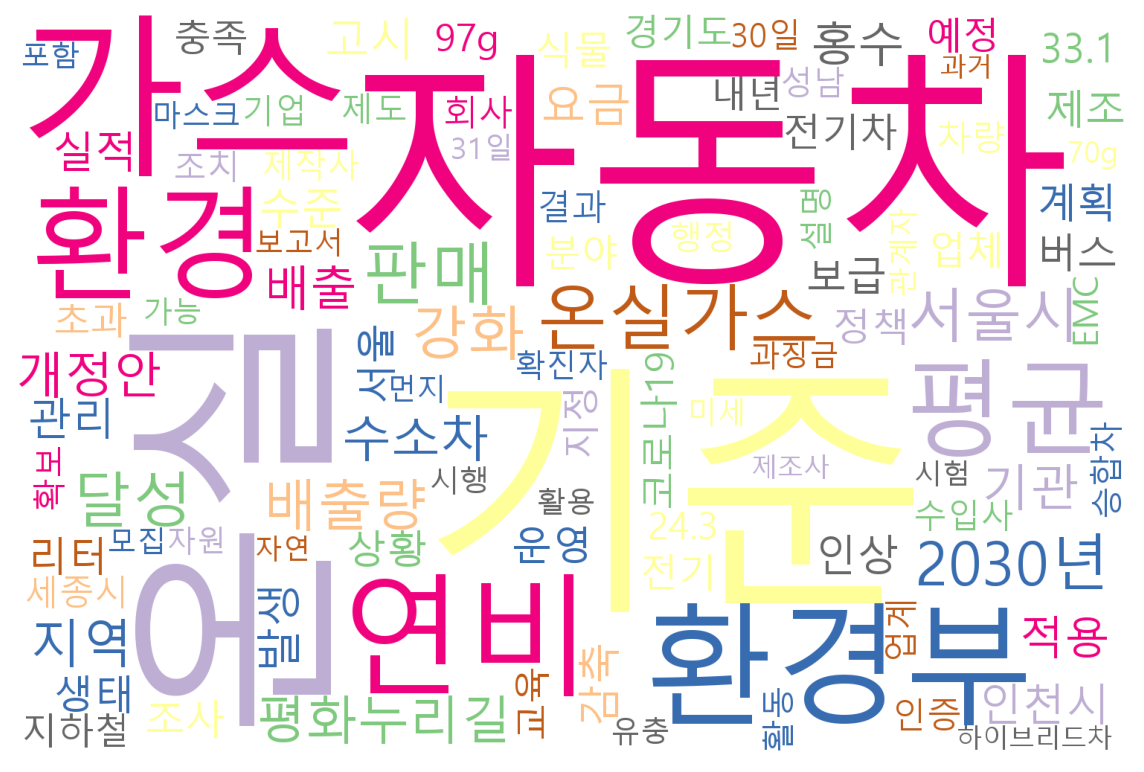

In [10]:
day= 20200830

keywords= dict(Counter(daylist_total[day].split(",")).most_common(100))
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(keywords) 
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()